# Computational Vision - Laboratory

==============================================================================================
## Practice 8: Image Segmentation

==============================================================================================

The main topic of this practice is to understand different **Top-down segmentation algorithms.**

In order to successfuly complete this practice it is necessary to understand the following theory concepts: snakes, level sets, etc.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.

## 8.1 Top down segmentation algorithms

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline)
- Add title to the figures to explain what is displayed.

In [1]:
%matplotlib inline

a) Read **'empty_plate.jpeg'** from the folder 'images' and segment it using **Active Contours.**
- Use different potentials and see the behaviour of the active contours algorithm.
- Test different parameters in order to obtain a good image segmentation. 
- How does each parameter behave? Which are the optimal values?
- Comment what algorithm is the method based in up to 3 lines most.

**Hint**
- Different potentials could be to use the original image itself, smoothed image (using Gaussian filter) and edge maps (using Canny).

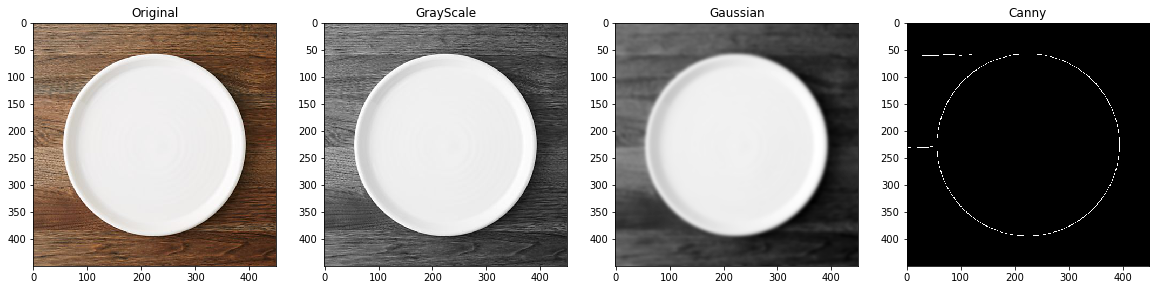

In [2]:
import os
import matplotlib.pyplot as plt

from skimage import io
from skimage.filters import gaussian
from skimage.feature import canny
from skimage.color import rgb2gray

img = io.imread(os.path.join('images', 'empty_plate.jpeg'))

potentials = [
    ('Original', img),
    ('GrayScale', rgb2gray(img)),
    ('Gaussian', gaussian(rgb2gray(img), 3)),
    ('Canny', canny(rgb2gray(img), 3)),
]

f, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, p in enumerate(potentials):
    if len(p[1].shape) == 2:
        ax[i].imshow(p[1], cmap=plt.cm.gray)
    else:
        ax[i].imshow(p[1])
    ax[i].set_title(p[0])
plt.show()

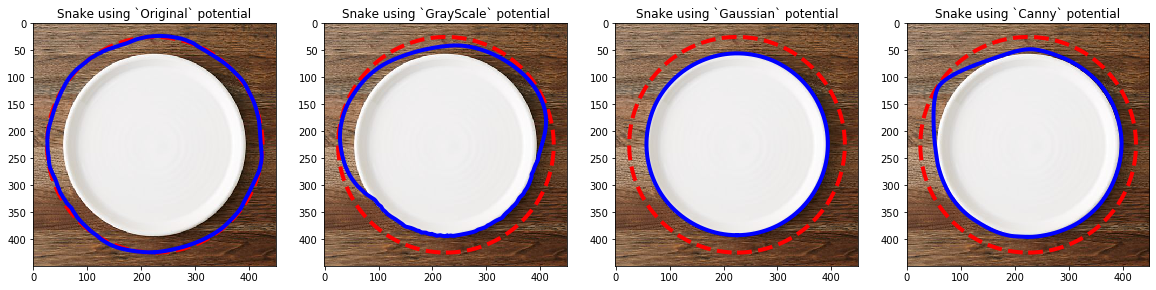

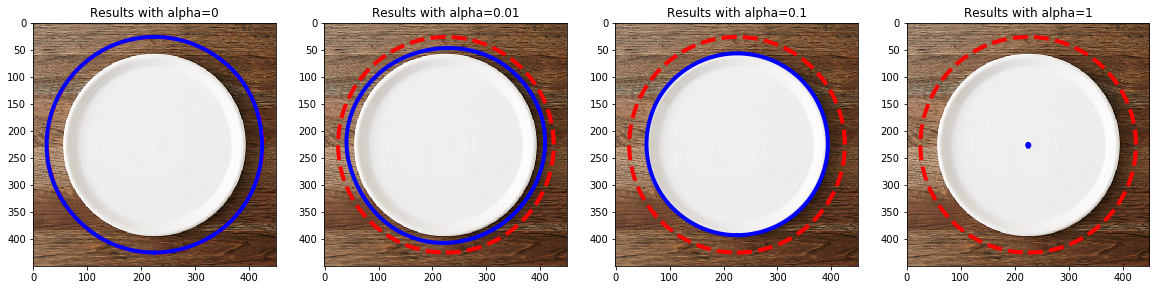

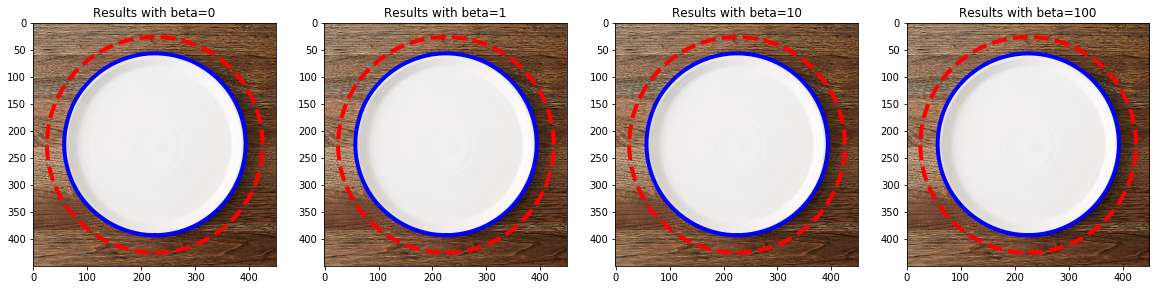

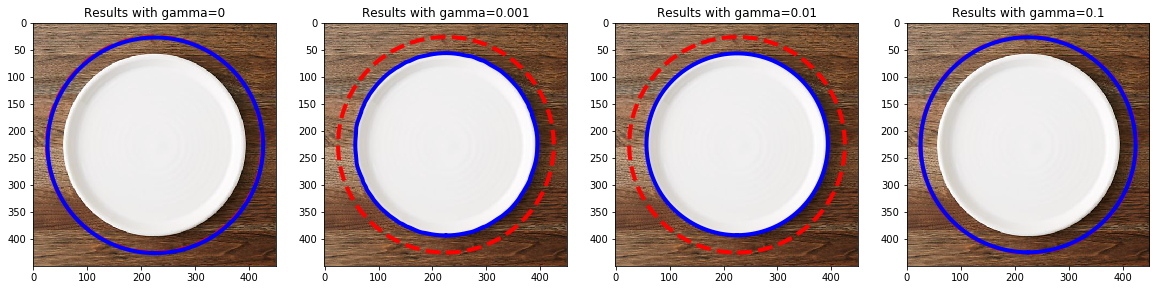

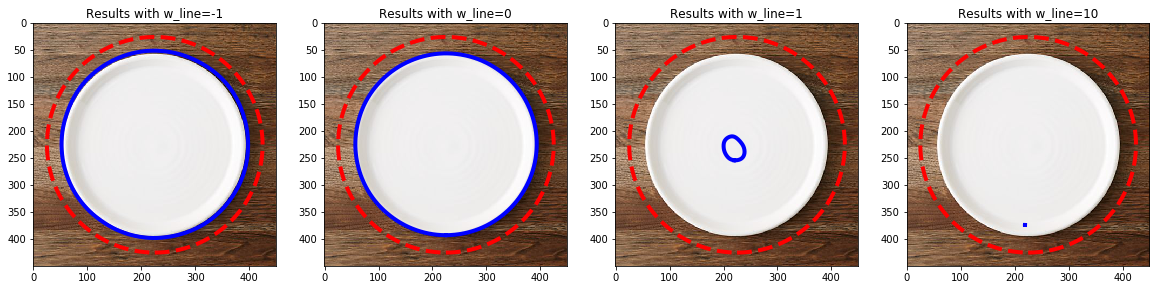

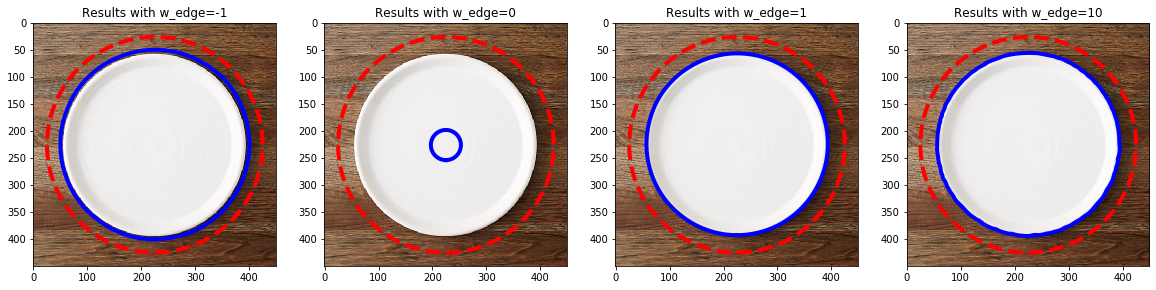

In [3]:
import numpy as np

from skimage import segmentation as seg
from skimage import filters as filt

def create_circumference(center, radius):
    s = np.linspace(0, 2 * np.pi, 400)
    r = center[0] / 2 + radius * np.sin(s)
    c = center[1] / 2 + radius * np.cos(s)
    return np.array([r, c]).T

#### Compare different potentials ####

f, ax = plt.subplots(1, 4, figsize=(20, 5))

snake = create_circumference((img.shape[0], img.shape[1]), 200)

for i, p in enumerate(potentials):
    opt_snake = seg.active_contour(p[1], snake=snake, alpha=0.1, beta=10, coordinates='rc')

    ax[i].imshow(img)
    ax[i].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
    ax[i].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
    ax[i].set_title(f'Snake using `{p[0]}` potential')
    
plt.show()

#### Compare Parameters ####

### ALPHA

f, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, alpha in enumerate([0, 0.01, 0.1, 1]):
    opt_snake = seg.active_contour(potentials[2][1], snake=snake,
                                   alpha=alpha, beta=10, coordinates='rc')
    
    ax[i].imshow(img)
    ax[i].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
    ax[i].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
    ax[i].set_title(f'Results with alpha={alpha}')

plt.show()

### BETA

f, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, beta in enumerate([0, 1, 10, 100]):
    opt_snake = seg.active_contour(potentials[2][1], snake=snake,
                                   alpha=0.1, beta=beta, coordinates='rc')
    
    ax[i].imshow(img)
    ax[i].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
    ax[i].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
    ax[i].set_title(f'Results with beta={beta}')

plt.show()

### GAMMA

f, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, gamma in enumerate([0, 0.001, 0.01, 0.1]):
    opt_snake = seg.active_contour(potentials[2][1], snake=snake,
                                   alpha=0.1, beta=10, gamma=gamma, coordinates='rc')
    
    ax[i].imshow(img)
    ax[i].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
    ax[i].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
    ax[i].set_title(f'Results with gamma={gamma}')

plt.show()

### W_LINE

f, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, w_line in enumerate([-1, 0, 1, 10]):
    opt_snake = seg.active_contour(potentials[2][1], snake=snake,
                                   alpha=0.1, beta=10, w_line=w_line, coordinates='rc')
    
    ax[i].imshow(img)
    ax[i].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
    ax[i].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
    ax[i].set_title(f'Results with w_line={w_line}')

plt.show()

### W_EDGE

f, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, w_edge in enumerate([-1, 0, 1, 10]):
    opt_snake = seg.active_contour(potentials[2][1], snake=snake,
                                   alpha=0.1, beta=10, w_edge=w_edge, coordinates='rc')
    
    ax[i].imshow(img)
    ax[i].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
    ax[i].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
    ax[i].set_title(f'Results with w_edge={w_edge}')

plt.show()

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**Effect of different potential images:**
    
We try the effect of using different initial images to apply the algorithm to, the raw image, converted to GrayScale and applying a Gaussian or a Canny filter. The best result is obtained with the *Gaussian filter*, as the non-filtered images (original and grayscale) have a lot of edges for the table woord pattern lines, which are smoothed using the Gaussian filter. Using Canny we should obtain even better results as we only have to deal with the edges we are interested in, and the rest is removed, but finding the optimal parameters for Canny is difficult, and it usually produces some background noisy edges which confuse the snake and give undesired results.
    
**Effect of different parameters:**
    
We will only do some experiments for the (which we consider) most relevant parameters.

- __*alpha*__ controls how fast the snake contracts. Using 0 the snake doesn't contract and the optimized snake is equivalent to the original one. Using 0.01 is still to slow and the snake is unable to reach the desired contour and using too large values such as 1, produce the snake to contract too fast, converging in a single point. A value of *0.1* produces good results.
- __*beta*__ makes the output snake line smoother the greater this values is.
- __*gamma*__ sets explicitly the time step for each iterations. We've found that the default parameter *0.01* works perfectly fine.
- __*w_line*__ weight indicates the attraction to brighter regions, using negative values to be attracted to darker regions. Default parameter value *0* works fine, as with negative values doesn't get close enough to the plate, and with positives the snake contracts too much inside the plate.
- __*w_edge*__ weight indicates the level of attraction to edges, using negative values to repel those. Default parameter value *1* works fine, as with negative values it doesn't get close enough to plate edges, with 0 it ignores the edge of the plate and with large positive values gets the same result than with 1 but getting a rougher snake.
    

**Algorithm base:** 
   
</div>

b) Segment the previous image using **Chan Vese.** 
- Test different parameters in order to obtain a good image segmentation.
- How does each parameter behave? Upto your opinion, which are the optimal values?
- Comment what algorithm is the method based in up to 3 lines.
- Plot the original image and the corresponding segments obtained from the algorithm.

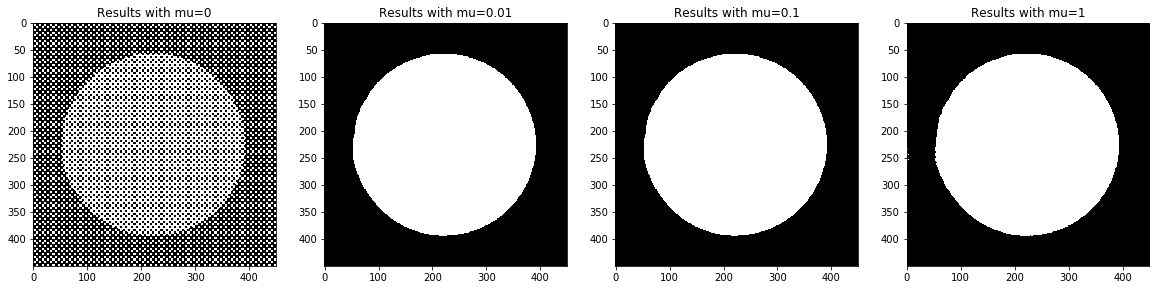

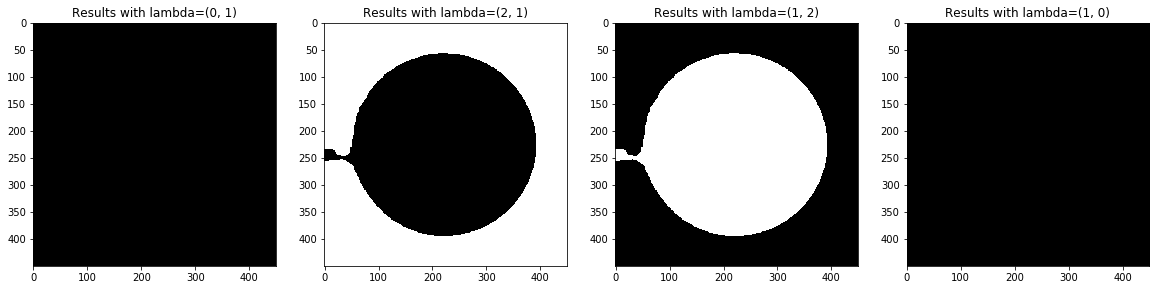

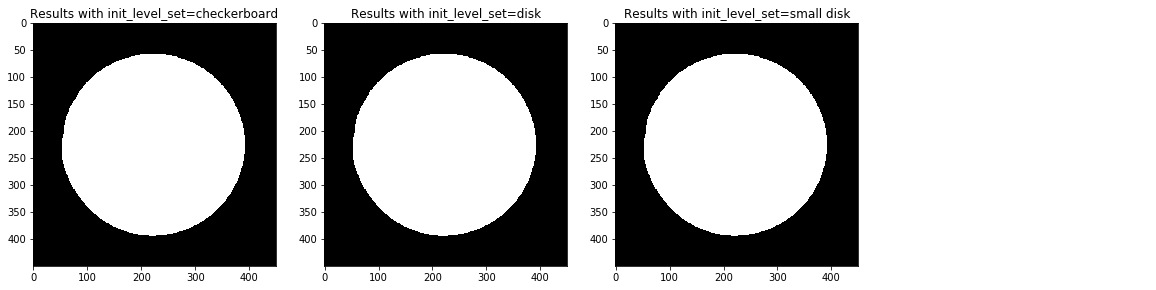

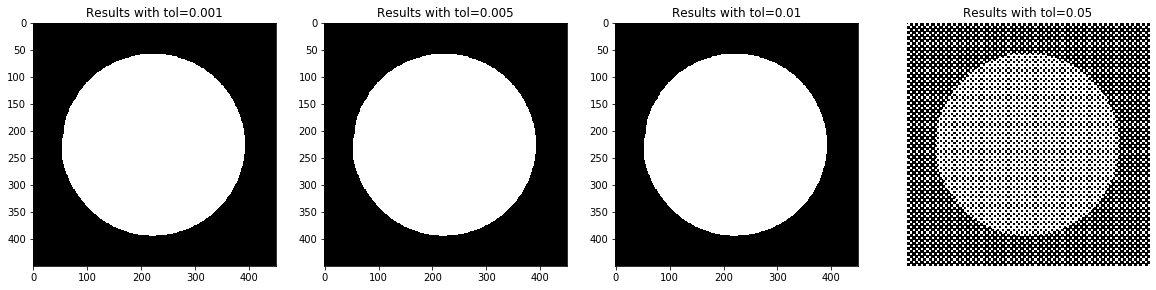

In [4]:
### MU

f, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, mu in enumerate([0, 0.01, 0.1, 1]):
    segmentation = seg.chan_vese(potentials[2][1],
                                 mu=mu, lambda1=1, lambda2=1, init_level_set='checkerboard')
    
    ax[i].imshow(segmentation, plt.cm.gray)
    ax[i].set_title(f'Results with mu={mu}')

plt.show()

### LAMBDAS

f, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, (lambda1, lambda2) in enumerate([(0, 1), (2, 1), (1, 2), (1, 0)]):
    segmentation = seg.chan_vese(potentials[2][1],
                                 mu=0.1, lambda1=lambda1, lambda2=lambda2, init_level_set='checkerboard')
    
    ax[i].imshow(segmentation, plt.cm.gray)
    ax[i].set_title(f'Results with lambda=({lambda1}, {lambda2})')

plt.show()

### INIT_LEVEL_SET

f, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[3].axis('off')

for i, init_level_set in enumerate(['checkerboard', 'disk', 'small disk']):
    segmentation = seg.chan_vese(potentials[2][1], mu=0.1, init_level_set=init_level_set)
    
    ax[i].imshow(segmentation, plt.cm.gray)
    ax[i].set_title(f'Results with init_level_set={init_level_set}')

#plt.show()

### TOL

f, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[3].axis('off')

for i, tol in enumerate([0.001, 0.005, 0.01, 0.05]):
    segmentation = seg.chan_vese(potentials[2][1], mu=0.1, init_level_set='checkerboard', tol=tol)
    
    ax[i].imshow(segmentation, plt.cm.gray)
    ax[i].set_title(f'Results with tol={tol}')

plt.show()

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
**Effect of different parameters:**
    
We will only do some experiments for the most relevant parameters.

- __*mu*__ is the 'edge length' weight, where higher values will produce a 'round' edge, near-0 ones are used to detect smaller objects. In our case the object to detect is quite large w.r.t. the image size and setting a null values still shows part of the initial checkerboard level set. A mu of *0.1* shows a good result with more smoothed boundaries compared to larger values.
- __*lambda(s)*__ weight the True and False output regions respectively. As it says in the paper, to obtain good results and keep the balance between positive and negative regions, both parameters are set to the same value, e.g. *1*. Unbalancing this values produces undesired results, being totally single-labeled when any of them is 0 and having some imperfections when not non-null weighted.
- __*init_level_set*__ doesn't seem to have many implications, at least in this case, that we want to segment a simple round plate which can be separated easily from the background. Hence, we keep using the default *checkerboard*.
- __*tol*__ defines the convergence point for level set variation tolerance between iterations. A large values makes it converge too fast and the result isn't appropiate. Hence we use the default parameter *0.001* which works perfectly fine.

**Algorithm base:** 
    
Starting from an initial level set, we evolve it iteratively to minimize an energy, defined by weighted values for the sum of differences of intensity from the average value outside the segmentation, the sum of differences from the average value inside the segmentation, and a boundary length dependent term.
   
</div>

c) Plot the original image and the results of the above algorithms in a 1x3 subplot.
- Comment the differences between each method as well as their advantages and disadvantages.

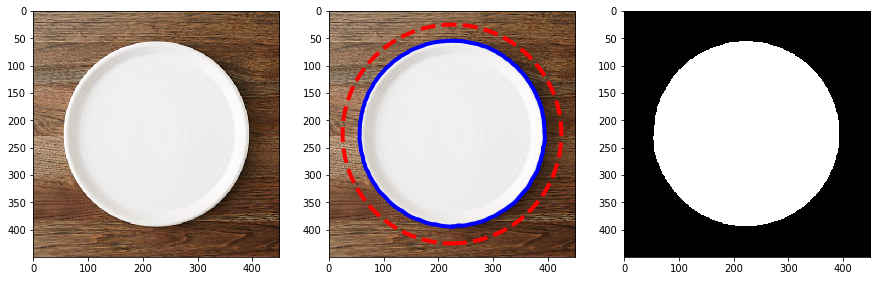

In [5]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img)

snake = create_circumference((img.shape[0], img.shape[1]), 200)
opt_snake = seg.active_contour(potentials[2][1], snake=snake, alpha=0.1, beta=10, w_edge=w_edge, coordinates='rc')

ax[1].imshow(img)
ax[1].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
ax[1].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)

segmentation = seg.chan_vese(potentials[2][1], mu=0.1, init_level_set='checkerboard')

ax[2].imshow(segmentation, cmap=plt.cm.gray)

plt.show()

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
Both methods are based on relatively similar techniques, energy minimization (reformulated in the level set formulation, as detailed in the original paper [1]). The difference is that the Chan-Vese model does not need to compute snakes.

As detailed in the slides of the course, one of the advantages of the Active Contours method are that it can effectively track and fit non-rigid shapes. In addition, the contour remains connected, and it is flexible the user can define how the energy function is defined. In contrast, it has some severe drawbacks. Specifically, it has a strong dependence on the initialization, which should be relatively close to the actual boundary. The aforementioned flexibility is a double-edged weapon, in the sense that it is an additional job for the user to define the parameters of the energy function depending on prior information.

Regarding the Chan-Vese model, one of the advantages is that it allows segmenting image using model of interior and exterior, and is not that dependent on the initialization. In theory, it should lead to better results, but in our case, it does not always, and in addition it is way slower.
    
</div>

d) Read **'chocolate.jpg'** from the folder 'images' and segment it using **the above segmentation algorithms.**
- Plot the results of the above algorithms in a 1x3 plot.
- Comment on the results between the segments obtained using 'empty_plate' image and the 'chocolate' image.

In [6]:
from skimage.transform import resize

img = io.imread(os.path.join('images', 'chocolate.jpg'))
img = resize(img, (img.shape[0] / 2, img.shape[1] / 2, 3))
preprocessed_img = filt.gaussian(rgb2gray(img), 3)

In [7]:
snake = create_circumference((img.shape[0], img.shape[1]), 255)
opt_snake = seg.active_contour(preprocessed_img, snake, alpha=0.1, beta=10, coordinates='rc')

In [8]:
segmentation = seg.chan_vese(preprocessed_img, mu=0.1, init_level_set='checkerboard')
marked_boundaries = seg.mark_boundaries(img, segmentation)

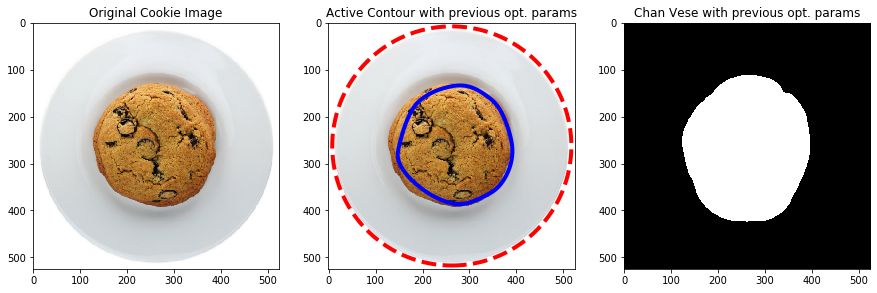

In [9]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img)
ax[0].set_title('Original Cookie Image')

ax[1].imshow(img)
ax[1].plot(snake[:, 0], snake[:, 1], '--r', lw=4)
ax[1].plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
ax[1].set_title('Active Contour with previous opt. params')

ax[2].imshow(segmentation, cmap='gray')
ax[2].set_title('Chan Vese with previous opt. params')

plt.show()

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
- Using `active_contour` with the same parameters than in plate, causes a different effect, detecting the cookie edges instead of the plate edges, as the difference of gradients between the plate and the background (also white) is much smaller than the difference between the plate and the cookie. We can fix it to detect the plate agian with a smaller *alpha=0.01*.
    
- Using `chain-vese` we obtain worse results in this case so we should keep the usage of active contour as it is also faster to compute.
    
</div>

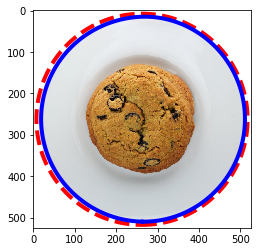

In [10]:
opt_snake = seg.active_contour(preprocessed_img, snake, alpha=0.01, beta=10, coordinates='rc')
plt.imshow(img)
plt.plot(snake[:, 0], snake[:, 1], '--r', lw=4)
plt.plot(opt_snake[:, 0], opt_snake[:, 1], '-b', lw=4)
plt.show()

e) Read **'2.jpg'** from the folder 'images' and segment it using **any one segmentation algorithm.**
- Segment the image into plate and biscuit.
- Find the number of biscuits on the plate.

Hint:
- skimage.measure.label is used to label connected regions of an integer array.
- skimage.color.label2rgb is used to return an RGB image where the color-coded labels are painted over the image.
- skimage.measure.regionprops is used to measure properties of labeled image regions.

In [11]:
from skimage.transform import resize

img = io.imread(os.path.join('images', '2.jpg'))
img = resize(img, (img.shape[0] / 10, img.shape[1] / 10, 3))
preprocessed_img = gaussian(rgb2gray(img), 2)

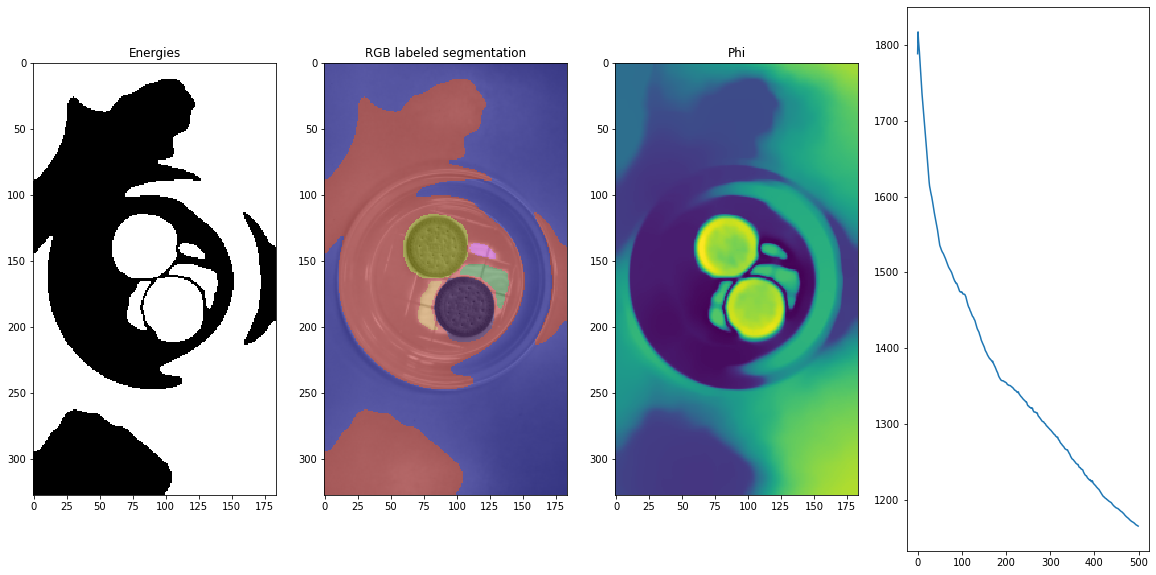

In [12]:
from skimage import measure
from skimage.color import label2rgb

segmentation, phi, energies = seg.chan_vese(preprocessed_img, lambda2=2,
                                            mu=0.01, init_level_set='checkerboard', extended_output=True)

marked_boundaries = seg.mark_boundaries(img, segmentation)

labels = measure.label(segmentation)
rgb_labels = label2rgb(labels, image=img)
props = measure.regionprops(labels)

f, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(segmentation, cmap=plt.cm.gray)
ax[0].set_title('Segmentation')

ax[1].imshow(rgb_labels)
ax[1].set_title('RGB labeled segmentation')

ax[2].imshow(phi)
ax[2].set_title('Phi')

ax[3].plot(energies)
ax[0].set_title('Energies')

plt.show()

In [13]:
snake1 = create_circumference((170, 280), 35)
opt_snake1 = seg.active_contour(preprocessed_img, snake=snake1, alpha=0.1, beta=10, coordinates='rc')

snake2 = create_circumference((210, 370), 35)
opt_snake2 = seg.active_contour(preprocessed_img, snake=snake2, alpha=0.13, beta=10, coordinates='rc')

There are a total of 2 biscuits.


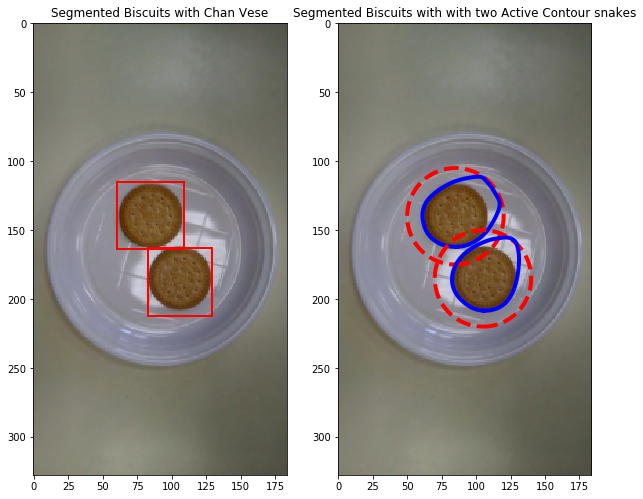

In [14]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, 2, figsize=(10, 15))

ax[0].imshow(img)
ax[0].set_title('Segmented Biscuits with Chan Vese')

count = 0
for region in props:
    # take regions with large enough areas and ignore big noisy background areas
    if region.area >= 1000 and region.area < 2000:
        count += 1
        
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax[0].add_patch(rect)
        
print(f'There are a total of {count} biscuits.')

ax[1].imshow(img)
ax[1].plot(snake1[:, 0], snake1[:, 1], '--r', lw=4)
ax[1].plot(opt_snake1[:, 0], opt_snake1[:, 1], '-b', lw=4)
ax[1].plot(snake2[:, 0], snake2[:, 1], '--r', lw=4)
ax[1].plot(opt_snake2[:, 0], opt_snake2[:, 1], '-b', lw=4)
ax[1].set_title(f'Segmented Biscuits with with two Active Contour snakes')

plt.show()

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
We have tried both methods to do the segmentation. The `active contours` one performs worse than `chan vese`, not being able to fit properly the biscuits for the illumination irregularities in the plate. The other one, despite of taking much more time allows us to get almost perfectly the segments by filtering extracted regions by threshold values (to eliminate too small and too large undesired regions).

</div>

## Delivery

**Compressed file**
- P7-8_Student1_Student2.zip that includes:
- The notebook P7-8_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used to run your notebook.

**Deadline (Campus Virtual): December 2nd, 11:00 p.m.**